<a href="https://colab.research.google.com/github/Roshan-Velpula/Machine-Learning-models-from-scratch/blob/main/LinearRegression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is a linear approach, meaning that it assumes a linear relationship between the variables.

In simple linear regression, there is only one independent variable, and the goal is to fit a straight line that best describes the relationship between that variable and the dependent variable.

A linear regression is typically trained using the (mean) squared error (MSE) as a loss function. This computes a least squares solution. The mean squared error minimizes the sum of squared residuals.


**Cost Function**: 

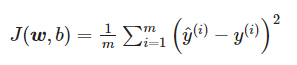

*Gradients:*


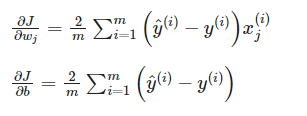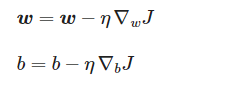

*Normal Equation:*

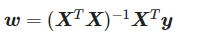

In [37]:
import numpy as np
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=6, bias=10, random_state=200)
m = 200

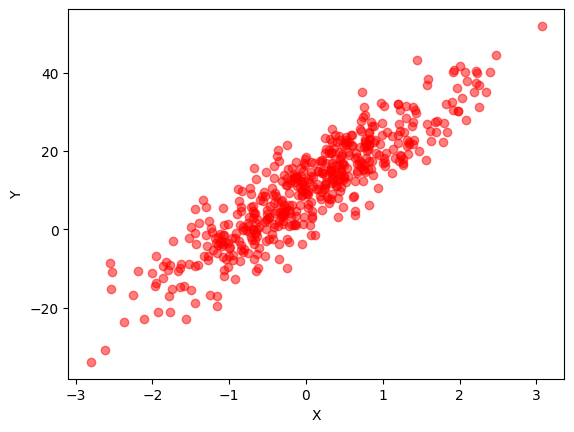

In [38]:
from matplotlib import pyplot as plt
plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
class LinearRegression:
  def __init__(self):
     pass
  
  def gradient(self, X,y, lr, n_iters):
    
    n_samples = X.shape[0]
    self.w = np.zeros(shape = (X.shape[1],1))
    self.b = 0
    costs = []
    if y.ndim != 2:
      y = y.reshape(-1, 1)
    j = 0
    while True:

      temp_w = self.w
      temp_b = self.b
      y_hat = np.dot(X,self.w) + self.b
      cost = (0.5/n_samples) * np.sum(((y - y_hat)**2))
      costs.append(cost)
      if j%100 == 0:
        print(f"Cost at {j} iteration : {cost}")
        print(f"w = {self.w} , b = {self.b}")

      dw = (1/n_samples ) * np.dot(X.T,(y_hat - y))
      db = (1/n_samples) * np.sum(y_hat - y)

      self.w = self.w - lr*dw
      self.b = self.b - lr*db

      if np.linalg.norm(self.w - temp_w) < pow(10, -6) and np.abs(self.b - temp_b) < pow(10, -6): #Stopping condition - if 2nd norm between previous and current values don't change significantly

        return self.w, self.b, costs


      if j > n_iters:

        return self.w, self.b, costs

      
      j+=1
  

  def train_equation(self, X, y):
    result = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    if result.ndim == 1:
        self.w = result[1:].reshape(-1, 1)
        self.b = result[0]
    elif result.ndim == 2:
        self.w = result[1:, :]
        self.b = result[0, 0]
    return self.w, self.b
  
  def predict(self, X):
    return np.dot(X, self.w) + self.b


In [72]:
regression = LinearRegression()

#Testing Gradient Method

In [73]:
w_train, b_train, costs = regression.gradient(X_train, y_train, lr = 0.05, n_iters = 1000)

Cost at 0 iteration : 145.36993682601303
w = [[0.]] , b = 0
Cost at 100 iteration : 17.696638246203893
w = [[11.92843611]] , b = 10.106894065024589
Cost at 200 iteration : 17.69342569586626
w = [[11.99535558]] , b = 10.14836719069457


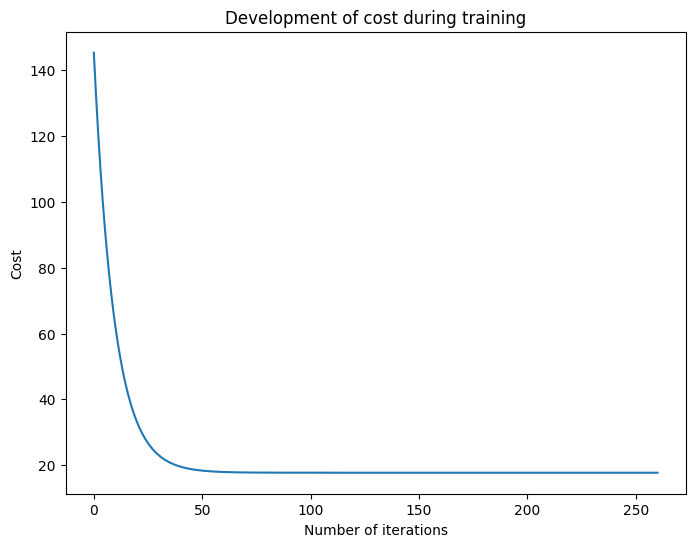

In [74]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(costs)), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [75]:
y_test_preds = regression.predict(X_test)

y_train_preds = regression.predict(X_train)

In [76]:
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y_train, y_train_preds)
MSE_test = mean_squared_error(y_test, y_test_preds)

In [77]:
print(MSE_train, MSE_test )

35.386851207924195 28.79837471683103


#Visualization

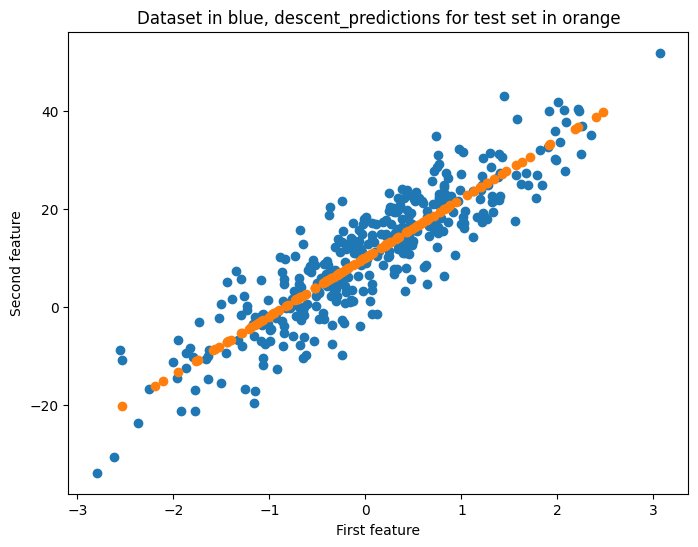

In [79]:
fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, descent_predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test_preds)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

#Testing Normal Equation method

In [83]:
X_b_train = np.c_[np.ones((X_train.shape[0])), X_train]
X_b_test = np.c_[np.ones((X_test.shape[0])), X_test]

reg_normal = LinearRegression()
w_trained, b_trained = reg_normal.train_equation(X_b_train, y_train)

In [88]:
w_trained, b_trained

(array([[11.99575994]]), 10.148506469400537)

### Result obtained is similar to gradient method

In [84]:
y_test_preds_eq = reg_normal.predict(X_test)

y_train_preds_eq = reg_normal.predict(X_train)

In [85]:
MSE_train = mean_squared_error(y_train, y_train_preds_eq)
MSE_test = mean_squared_error(y_test, y_test_preds_eq)

In [86]:
print(MSE_train, MSE_test )

35.38685120757452 28.79836608304776


#Visualization

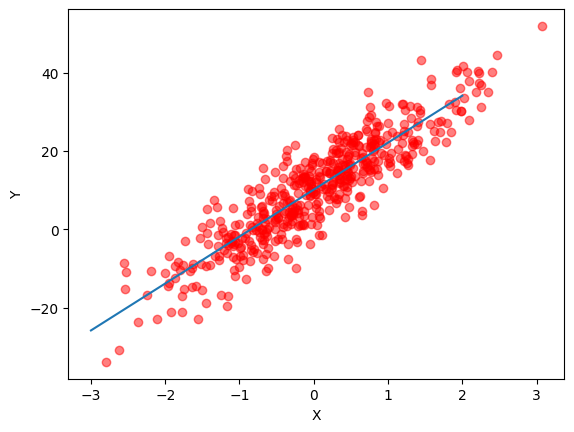

In [92]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = np.array([formula(i) for i in x]) # create array for y values
    plt.plot(x, y)  
    
def my_formula(x):
    return (b_trained + w_trained*x).ravel()

plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
graph(my_formula, range(-3,3))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()